<a href="https://colab.research.google.com/github/Silosk01/IA_/blob/main/Pr%C3%A1ctica_3_Adaline_multicapa_Fuente_de_datos_personal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-3-44898fcd9fcb>:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


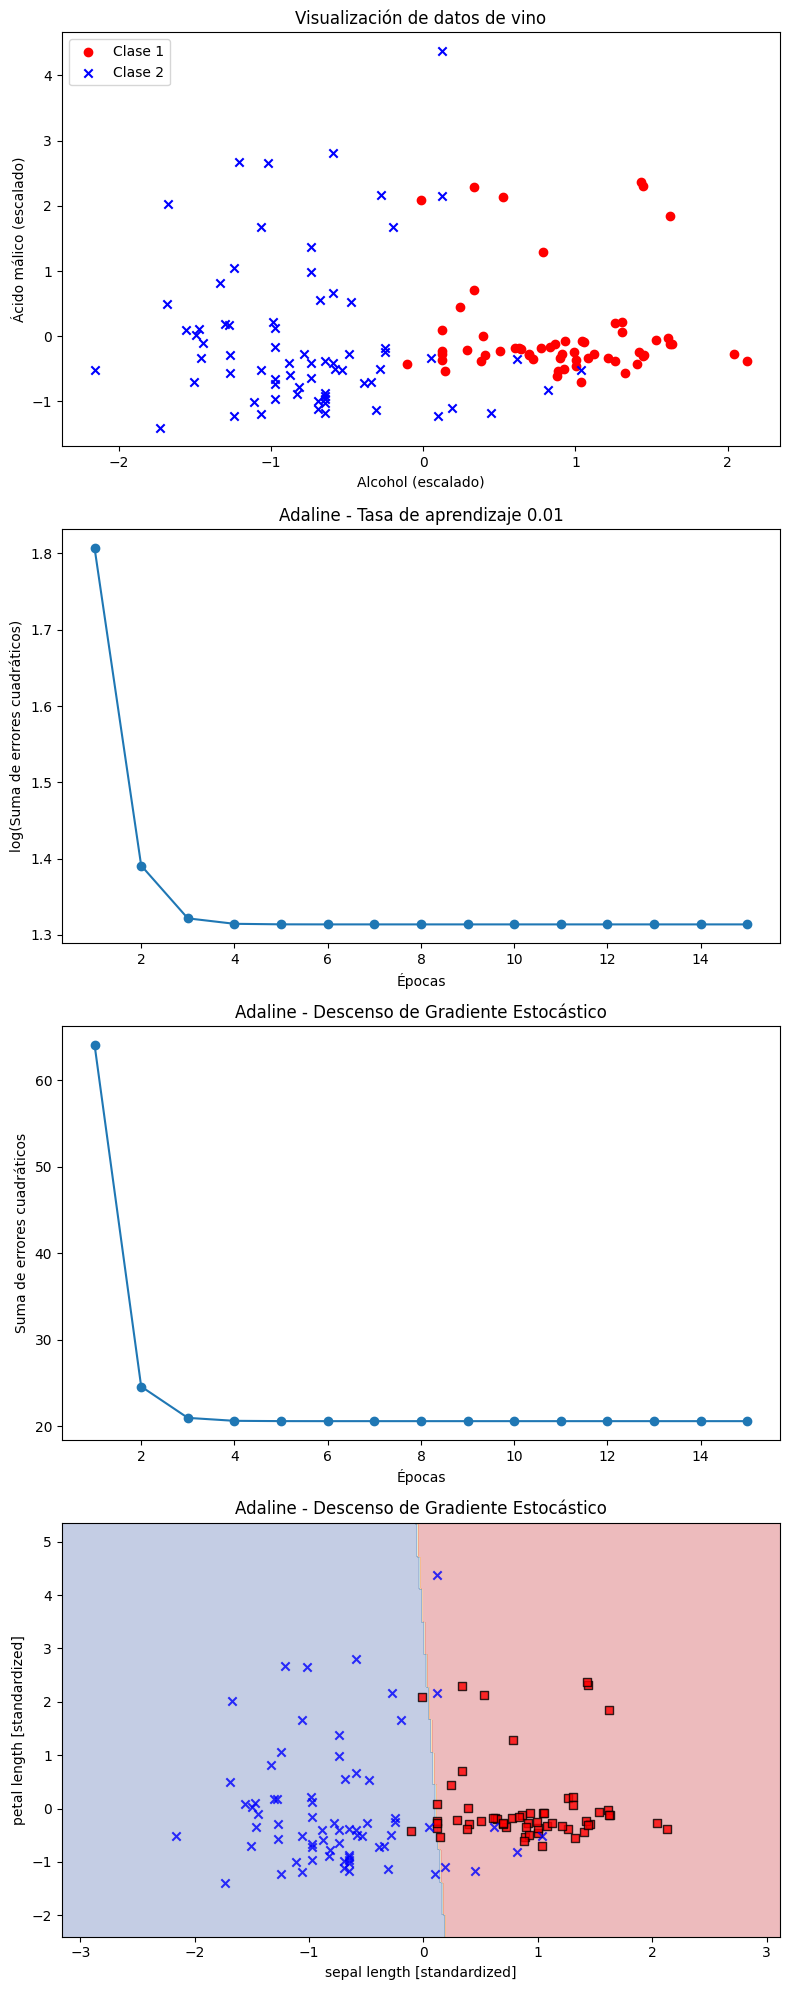

Precisión del modelo Adaline: 0.91


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = plt.cm.RdYlBu

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

def plot_data_and_errors(X, y, adaline):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(8, 20))

    ax1.scatter(X[y == -1, 0], X[y == -1, 1], color='red', marker='o', label='Clase 1')
    ax1.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='x', label='Clase 2')
    ax1.set_xlabel('Alcohol (escalado)')
    ax1.set_ylabel('Ácido málico (escalado)')
    ax1.legend(loc='upper left')
    ax1.set_title('Visualización de datos de vino')

    #logg
    ax2.plot(range(1, len(adaline.cost_) + 1), np.log10(adaline.cost_), marker='o')
    ax2.set_xlabel('Épocas')
    ax2.set_ylabel('log(Suma de errores cuadráticos)')
    ax2.set_title('Adaline - Tasa de aprendizaje 0.01')

    ax3.plot(range(1, len(adaline.cost_) + 1), adaline.cost_, marker='o')
    ax3.set_xlabel('Épocas')
    ax3.set_ylabel('Suma de errores cuadráticos')
    ax3.set_title('Adaline - Descenso de Gradiente Estocástico')

    ax4.set_title('Adaline - Descenso de Gradiente Estocástico')
    ax4.set_xlabel('sepal length [standardized]')
    ax4.set_ylabel('petal length [standardized]')
    plot_decision_regions(X, y, classifier=adaline)

    plt.tight_layout()
    plt.show()

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
X, y = load_wine_data(url)
X_scaled = preprocess_data(X)


adaline = AdalineGD(eta=0.01, n_iter=15)
adaline.fit(X_scaled, y)


plot_data_and_errors(X_scaled, y, adaline)


y_pred = adaline.predict(X_scaled)
accuracy = np.mean(y_pred == y)
print(f'Precisión del modelo Adaline: {accuracy:.2f}')